In [1]:
import os
os.chdir('..')

In [128]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-darkgrid")
def get_from_logfile(path, tags):
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    it = 0

    for ev, event in enumerate(summary_iterator(path)):
        for value in event.summary.value:
            if value.tag in tags:
                idx = tags.index(value.tag)
                returns[it, idx] = value.simple_value
                if idx == 0 and ev!=0:
                    it += 1

    return pd.DataFrame(returns, columns = tags).dropna()

# Problem 1

## First sub-part

In [129]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q1_env" in path and "events" in name)]

In [130]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env1_random_PointmassEasy-v0_14-11-2022_05-44-27\\events.out.tfevents.1668404667.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env1_rnd_PointmassEasy-v0_14-11-2022_05-16-14\\events.out.tfevents.1668402974.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env2_random_PointmassMedium-v0_14-11-2022_06-28-06\\events.out.tfevents.1668407286.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env2_rnd_PointmassMedium-v0_14-11-2022_06-08-31\\events.out.tfevents.1668406111.9d1e5d22fbc5']

In [131]:
random_easy = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rnd_easy = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
random_medium = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rnd_medium = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
random_easy.set_index("Train_EnvstepsSoFar", inplace=True)
rnd_easy.set_index("Train_EnvstepsSoFar", inplace=True)
random_medium.set_index("Train_EnvstepsSoFar", inplace=True)
rnd_medium.set_index("Train_EnvstepsSoFar", inplace=True)

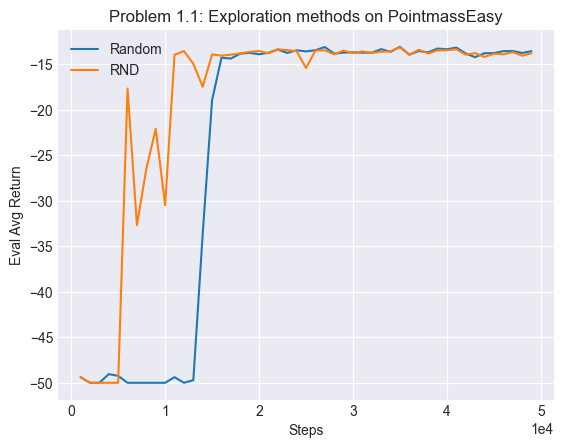

In [132]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(random_easy, label="Random")
plt.plot(rnd_easy, label="RND")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.1: Exploration methods on PointmassEasy");
plt.savefig("report/q1_1_easy.jpg", dpi=600)

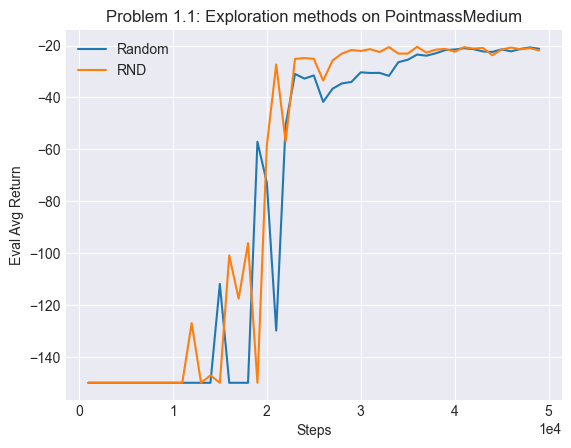

In [133]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(random_medium, label="Random")
plt.plot(rnd_medium, label="RND")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.1: Exploration methods on PointmassMedium");
plt.savefig("report/q1_1_medium.jpg", dpi=600)

## Second sub.part

In [134]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q1_alg" in path and "events" in name)]

In [135]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_alg_easy_PointmassEasy-v0_18-11-2022_22-50-39\\events.out.tfevents.1668811839.e14d55b5c153',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_alg_med_PointmassMedium-v0_18-11-2022_22-35-57\\events.out.tfevents.1668810957.e14d55b5c153']

In [136]:
boltzmann_easy = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
boltzmann_medium = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
boltzmann_easy.set_index("Train_EnvstepsSoFar", inplace=True)
boltzmann_medium.set_index("Train_EnvstepsSoFar", inplace=True)

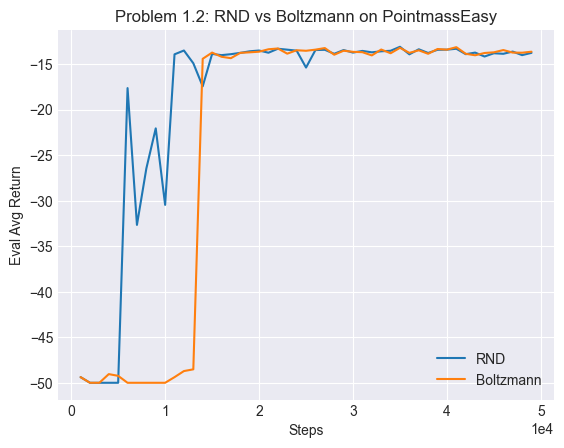

In [137]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(rnd_easy, label="RND")
plt.plot(boltzmann_easy, label="Boltzmann")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.2: RND vs Boltzmann on PointmassEasy");
plt.savefig("report/q1_2_easy.jpg", dpi=600)

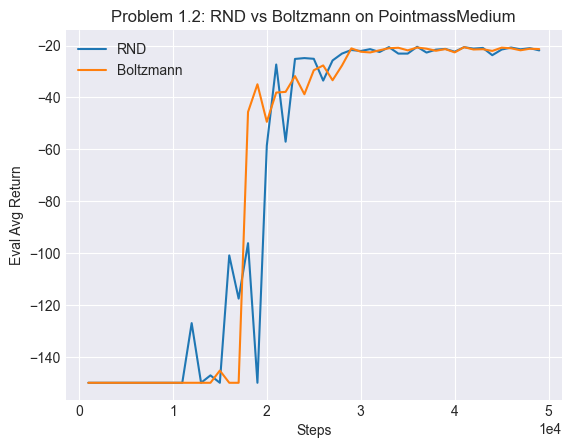

In [138]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(rnd_medium, label="RND")
plt.plot(boltzmann_medium, label="Boltzmann")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.2: RND vs Boltzmann on PointmassMedium");
plt.savefig("report/q1_2_medium.jpg", dpi=600)

# Problem 2

In [139]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q2" in path and "events" in name)]

In [140]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_alpha0.02_PointmassMedium-v0_15-11-2022_00-26-53\\events.out.tfevents.1668472013.1d1420b1b2f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_alpha0.5_PointmassMedium-v0_15-11-2022_06-04-57\\events.out.tfevents.1668492297.3d3cdd96f0f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_14-11-2022_22-19-41\\events.out.tfevents.1668464381.1d1420b1b2f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_14-11-2022_22-08-10\\events.out.tfevents.1668463690.1d1420b1b2f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_cql_PointmassMedium-v0_14-11-2022_07-29-51\\events.out.tfevents.1668410991.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall

In [141]:
problem2_3_alpha002 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_3_alpha05 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_cqlnumsteps15000 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_cqlnumsteps5000 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_1_cql = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_1_shiftscale = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_dqnnumsteps15000 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_dqnnumsteps5000 = get_from_logfile(files[7], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_1_dqn = get_from_logfile(files[8], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])

problem2_3_alpha002.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_3_alpha05.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_cqlnumsteps15000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_cqlnumsteps5000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_1_cql.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_1_shiftscale.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_dqnnumsteps15000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_dqnnumsteps5000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_1_dqn.set_index("Train_EnvstepsSoFar", inplace=True)

## Problem 2.1

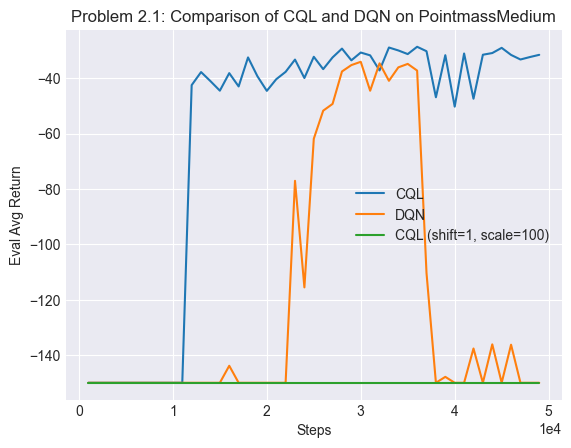

In [142]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(problem2_1_cql, label="CQL")
plt.plot(problem2_1_dqn, label="DQN")
plt.plot(problem2_1_shiftscale, label="CQL (shift=1, scale=100)")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.1: Comparison of CQL and DQN on PointmassMedium");
plt.savefig("report/q2_1.jpg", dpi=600)

## Problem 2.2

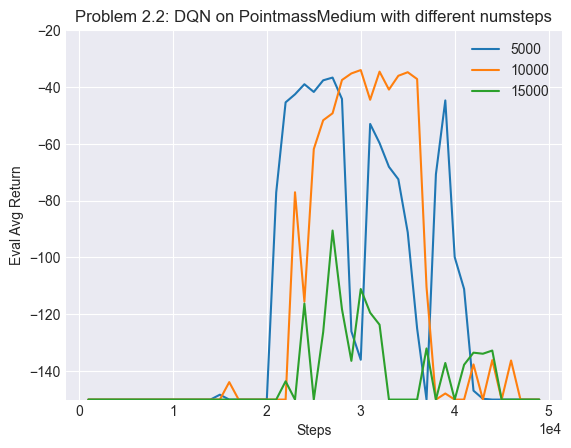

In [143]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(problem2_2_dqnnumsteps5000, label="5000")
plt.plot(problem2_1_dqn, label="10000")
plt.plot(problem2_2_dqnnumsteps15000, label="15000")
plt.legend()
plt.ylim(-150, -20)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.2: DQN on PointmassMedium with different numsteps");
plt.savefig("report/q2_2_dqn.jpg", dpi=600)

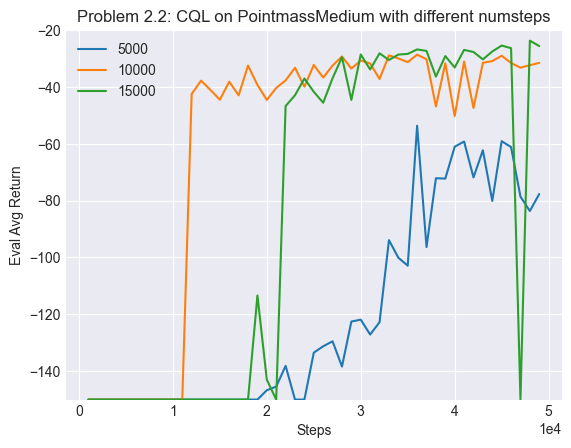

In [144]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(problem2_2_cqlnumsteps5000, label="5000")
plt.plot(problem2_1_cql, label="10000")
plt.plot(problem2_2_cqlnumsteps15000, label="15000")
plt.legend()
plt.ylim(-150, -20)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.2: CQL on PointmassMedium with different numsteps");
plt.savefig("report/q2_2_cql.jpg", dpi=600)

## Problem 2.3

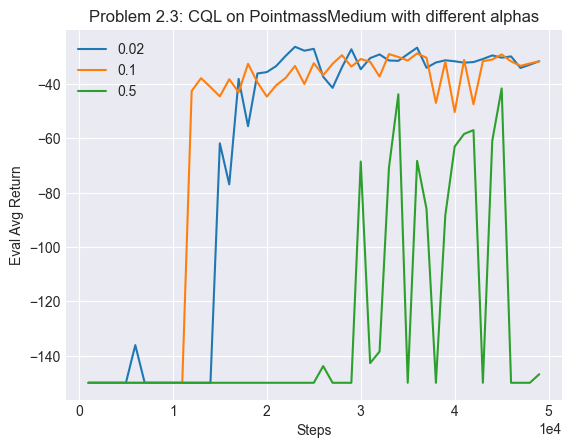

In [145]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.plot(problem2_3_alpha002, label="0.02")
plt.plot(problem2_1_cql, label="0.1")
plt.plot(problem2_3_alpha05, label="0.5")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.3: CQL on PointmassMedium with different alphas");
plt.savefig("report/q2_3.jpg", dpi=600)

# Problem 3

In [146]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q3" in path and "events" in name)]

In [147]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_hard_cql_PointmassHard-v0_15-11-2022_18-00-22\\events.out.tfevents.1668535222.3cebf9d3a49e',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_hard_dqn_PointmassHard-v0_15-11-2022_17-46-01\\events.out.tfevents.1668534361.3cebf9d3a49e',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_medium_cql_PointmassMedium-v0_15-11-2022_07-00-41\\events.out.tfevents.1668495641.3d3cdd96f0f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_medium_dqn_PointmassMedium-v0_15-11-2022_06-34-44\\events.out.tfevents.1668494084.3d3cdd96f0f9']

In [148]:
cql_hard = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
dqn_hard = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
cql_medium = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
dqn_medium = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
cql_hard.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_hard.set_index("Train_EnvstepsSoFar", inplace=True)
cql_medium.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_medium.set_index("Train_EnvstepsSoFar", inplace=True)

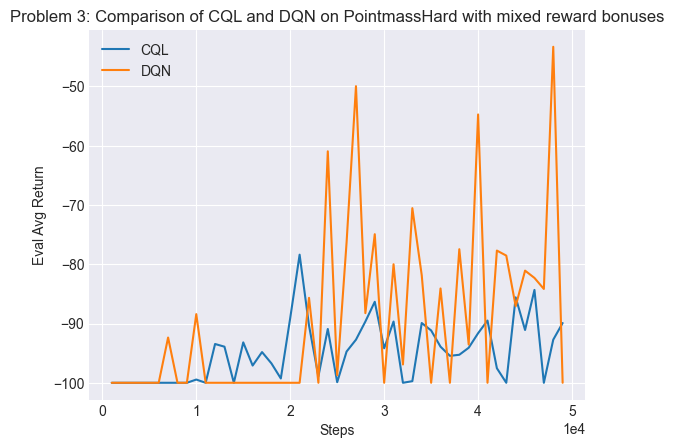

In [149]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(cql_hard, label="CQL")
plt.plot(dqn_hard, label="DQN")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 3: Comparison of CQL and DQN on PointmassHard with mixed reward bonuses");
plt.savefig("report/q3_hard.jpg", dpi=600)

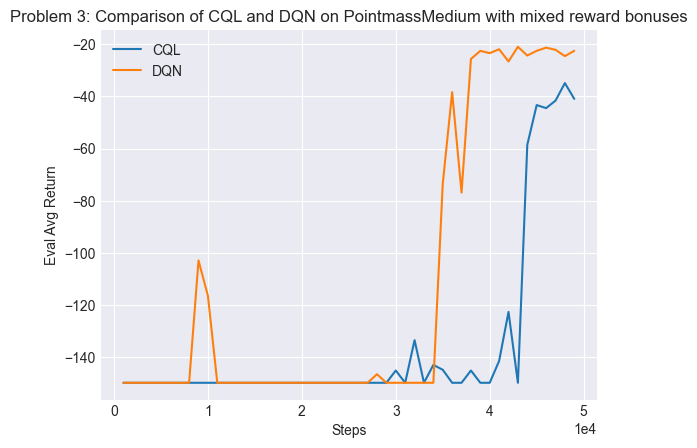

In [150]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(cql_medium, label="CQL")
plt.plot(dqn_medium, label="DQN")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 3: Comparison of CQL and DQN on PointmassMedium with mixed reward bonuses");
plt.savefig("report/q3_medium.jpg", dpi=600)

# Problem 4

## Easy and supervised

In [151]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_easy_supervised" in path and "events" in name)]

In [152]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam0.1_PointmassEasy-v0_17-11-2022_06-47-45\\events.out.tfevents.1668667665.12137d466644',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam10_PointmassEasy-v0_16-11-2022_17-14-12\\events.out.tfevents.1668618852.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam1_PointmassEasy-v0_16-11-2022_16-14-41\\events.out.tfevents.1668615281.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam20_PointmassEasy-v0_16-11-2022_17-42-23\\events.out.tfevents.1668620543.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam2_PointmassEasy-v0_16-11-2022_16-42-30\\events.out.tfevents.1668616

In [153]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

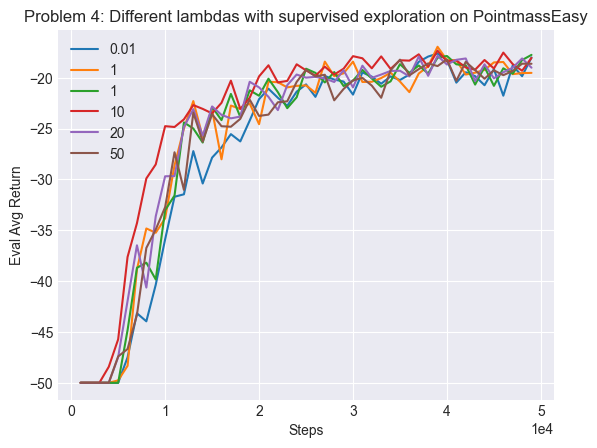

In [154]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.01")
plt.plot(lam1, label="1")
plt.plot(lam2, label="1")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with supervised exploration on PointmassEasy");
plt.savefig("report/q4_easy_supervised.jpg", dpi=600)

## Easy and unsupervised

In [155]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_easy_unsupervised" in path and "events" in name)]

In [156]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam0.1_PointmassEasy-v0_16-11-2022_01-18-15\\events.out.tfevents.1668561495.61bd7eb33b65',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam10_PointmassEasy-v0_16-11-2022_06-16-28\\events.out.tfevents.1668579388.10f80bbb37e7',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam1_PointmassEasy-v0_16-11-2022_04-14-10\\events.out.tfevents.1668572050.3839c0a0d1a3',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam20_PointmassEasy-v0_16-11-2022_06-44-57\\events.out.tfevents.1668581097.10f80bbb37e7',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam2_PointmassEasy-v0_16-11-2022_05-34-05\\events.out.tfeven

In [157]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

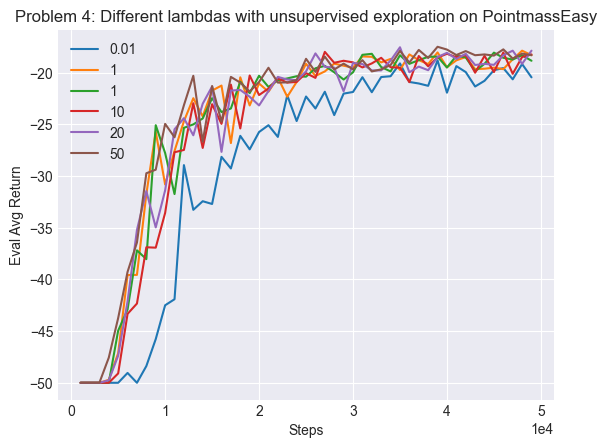

In [158]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.01")
plt.plot(lam1, label="1")
plt.plot(lam2, label="1")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with unsupervised exploration on PointmassEasy");
plt.savefig("report/q4_easy_unsupervised.jpg", dpi=600)

## Medium and supervised

In [159]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_medium_supervised" in path and "events" in name)]

In [160]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam0.1_PointmassMedium-v0_16-11-2022_20-40-43\\events.out.tfevents.1668631243.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam10_PointmassMedium-v0_16-11-2022_21-40-46\\events.out.tfevents.1668634846.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam1_PointmassMedium-v0_16-11-2022_21-00-43\\events.out.tfevents.1668632443.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam20_PointmassMedium-v0_16-11-2022_22-01-07\\events.out.tfevents.1668636067.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam2_PointmassMedium-v0_16-11-2022_21-20-48\\events.

In [161]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

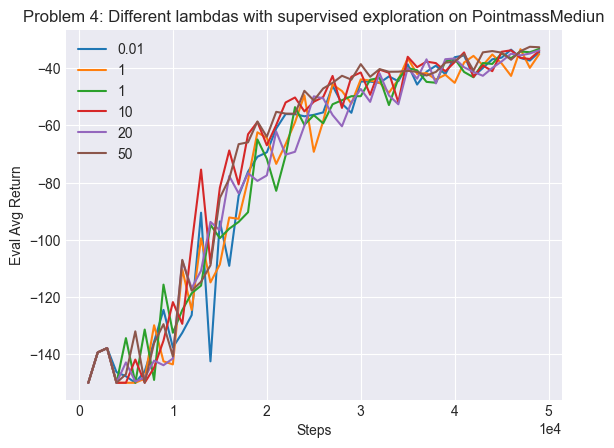

In [162]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.01")
plt.plot(lam1, label="1")
plt.plot(lam2, label="1")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with supervised exploration on PointmassMediun");
plt.savefig("report/q4_medium_supervised.jpg", dpi=600)

## Medium and unsupervised

In [163]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_medium_unsupervised" in path and "events" in name)]

In [164]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam0.1_PointmassMedium-v0_16-11-2022_18-42-00\\events.out.tfevents.1668624120.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam10_PointmassMedium-v0_16-11-2022_19-41-11\\events.out.tfevents.1668627671.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam1_PointmassMedium-v0_16-11-2022_19-02-05\\events.out.tfevents.1668625325.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam20_PointmassMedium-v0_16-11-2022_20-00-43\\events.out.tfevents.1668628843.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam2_PointmassMedium-v0_16-11-2022_19-22-0

In [165]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

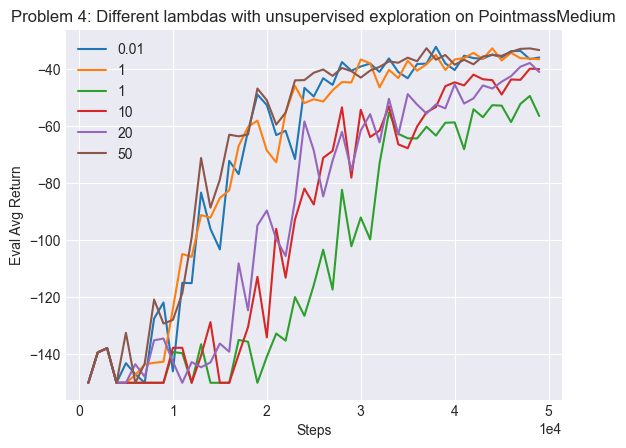

In [166]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.01")
plt.plot(lam1, label="1")
plt.plot(lam2, label="1")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with unsupervised exploration on PointmassMedium");
plt.savefig("report/q4_medium_unsupervised.jpg", dpi=600)

In [167]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.
